In [3]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

In [4]:
def ec_mov(x_p,t,a=0):
    # x_p representa x , y, , px, py 
    r32 = (x_p[0]**2 + x_p[1]**2)**(1.5)
    desv = 1. + a
    dx = x_p[2]*desv
    dy = x_p[3]
    dpx = -(x_p[0]*desv)/r32
    dpy = -(x_p[1]*desv)/r32
    return array([dx,dy,dpx,dpy])

In [5]:
def rk4_a(ec,p_ini,x,args=0,h=0.001):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)

    return tiempos,sol

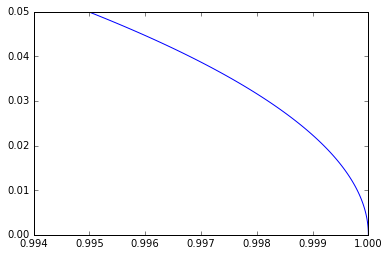

In [6]:
t,sol = rk4_a(ec_mov,[1,0,0,0.5],[0,0.1])
plot(sol[:,0],sol[:,1])

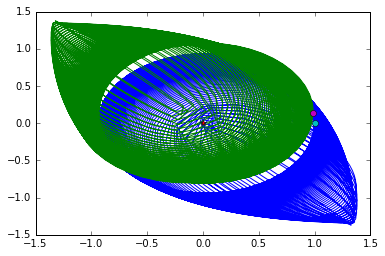

[ 0.17516289 -0.98168642 -0.75473637  0.63859802]


In [77]:
#t = linspace(0,30,10)
#sol = odeint(ec_mov,[1,0,0,0.5],t,args=(0.05,))
#plot(sol[:,0],sol[:,1])
alfa = 0.05
t = linspace(0,2*pi*100,5000)
sol = odeint(ec_mov,[1,0,0,1],t,args=(alfa,),rtol=1e-15)
sol2 = odeint(ec_mov,[0.99,sqrt(1-.99**2),0,1],t,args=(alfa,),rtol=1e-15)
plot(sol[:,0],sol[:,1])
plot(sol2[:,0],sol2[:,1])
plot(0,0,'*')
plot(sol[0,0],sol[0,1],'o'),plot(sol2[0,0],sol2[0,1],'o')
show()
print sol[-1,:]

In [78]:
def Energia(x_p,a):
    x,y,px,py = x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    E = 0.5*(px*px*(1. + a) + py**2) - ((1.+a)/sqrt(x**2+y**2))
    return E

def L_z(x_p):
    x,y,px,py = x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    L = x*py - y*px
    return L

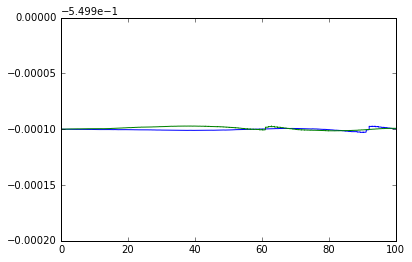

In [79]:
E = Energia(sol,alfa)
E2 = Energia(sol2,alfa)
ylim([E[0]-.0001,E[0]+0.0001])
#xlim([2885,2895])
plot(t/(2*pi),E)
plot(t/(2*pi),E2)

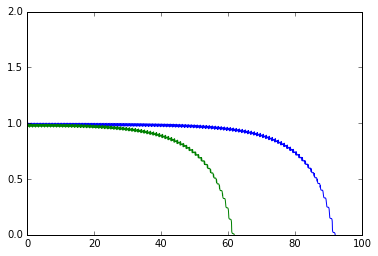

In [80]:
L=L_z(sol)
L2=L_z(sol2)

ylim(L[0]-1,L[0]+1)
plot(t/(2*pi),L)
plot(t/(2*pi),L2)
show()

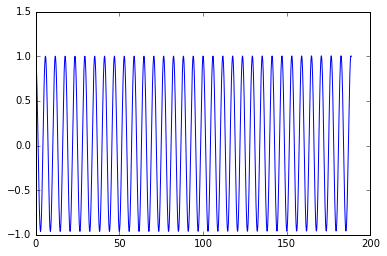

In [63]:
plot(t,sol[:,0])

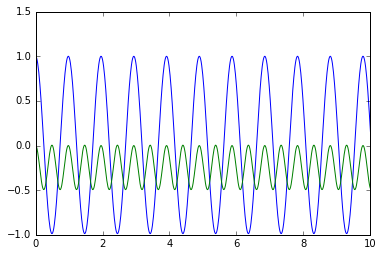

In [35]:
xlim(0,10)
plot(t/(2*pi),sol[:,0])
plot(t/(2*pi),100*(L-1))